# Basic Classification: Classify images of clothing
```


In [2]:
#import tensorflow
import tensorflow as tf

#import other libraries
import numpy as np
import matplotlib.pyplot as plt

# Import the Fashion MNIST dataset

The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.


In [3]:
data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [4]:
#
name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

# Data preprocessing

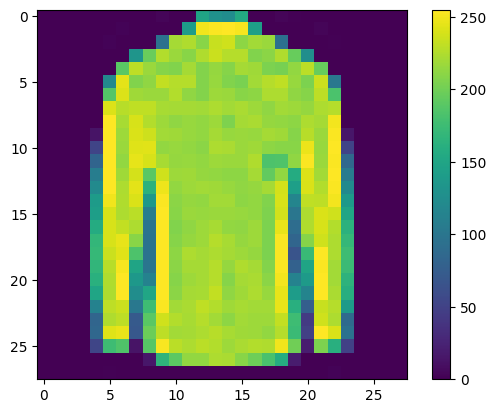

In [13]:
plt.figure()
plt.imshow(train_images[12012])
plt.colorbar()
plt.grid(False)
plt.show()

scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

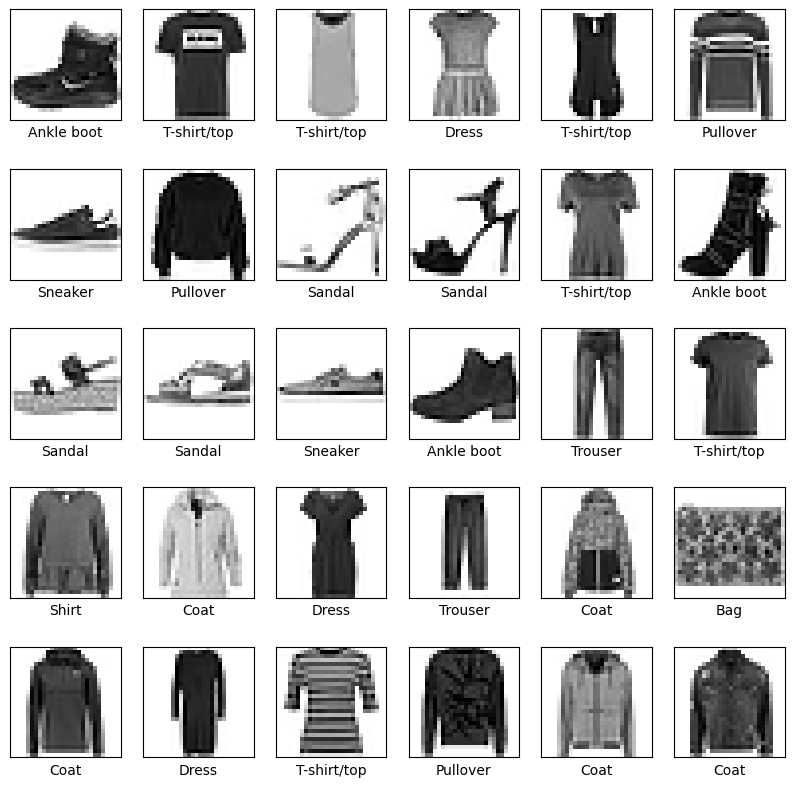

In [15]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(name[train_labels[i]])
plt.show()

# Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

1. `model = tf.keras.Sequential([...])`: This line is initializing a Sequential model. The Sequential model is a linear stack of layers. You can create a Sequential model and define all layers in the constructor.

2. `tf.keras.layers.Flatten(input_shape=(28, 28))`: The first layer in this network is a Flatten layer, which transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer has no parameters to learn; it only reformats the data. You can think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

3. `tf.keras.layers.Dense(128,activation=tf.nn.relu)`: After the pixels are flattened, the network consists of a sequence of two Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The activation function is 'relu', or Rectified Linear Unit, which is a simple function that allows the model to solve nonlinear problems.

4. `tf.keras.layers.Dense(10)`: The last layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes. This layer has no activation function specified, so it will use a linear activation function by default (i.e., the output is the weighted sum of the inputs).

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])


# Compile the model


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
1. `optimizer='adam'`: This sets the optimizer for the model to 'adam'. The optimizer is the algorithm that the model uses to minimize the loss function. 'Adam' is a popular choice because it adapts the learning rate based on how training is going and proves effective across a wide range of problems.

2. `loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: This sets the loss function for the model. The loss function measures how well the model is doing on training, and the goal is to minimize this function. In this case, the loss function is set to 'SparseCategoricalCrossentropy', which is suitable for multi-class classification problems. The `from_logits=True` argument means that the function should interpret the model's output as raw log-odds ratios, also known as logits.

3. `metrics=['accuracy']`: This sets the list of metrics to be evaluated during training and testing. In this case, the model will measure 'accuracy', which is the proportion of the images that are correctly classified. 

In summary, this code is setting up the model to use the Adam optimizer, the Sparse Categorical Crossentropy loss function, and to measure its performance using accuracy.


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:
1. `train_images`: This is the training data or the input data for the model. In this case, it's a set of images that the model will learn from.

2. `train_labels`: These are the labels or the actual outcomes for each image in the training data. The model uses this to understand the relationship between the input data (images) and the output data (labels).

3. `epochs=10`: This is the number of times the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is a measure of the number of times all of the training vectors are used once to update the weights. In this case, the model will be trained for 10 epochs.

In summary, this line of code is training the model on the `train_images` and `train_labels` data for 10 epochs. This means the model will iterate over the entire dataset 10 times, each time learning and updating its parameters to reduce the loss and improve the accuracy.

In [22]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1147 - accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1126 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1075 - accuracy: 0.9602
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1077 - accuracy: 0.9590
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9613
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1047 - accuracy: 0.9614
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1023 - accuracy: 0.9610
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1011 - accuracy: 0.9623
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0998 - accuracy: 0.9625
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.096

Evaluate accuracy

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5226 - accuracy: 0.8860 - 554ms/epoch - 2ms/step

Test accuracy: 0.8859999775886536


# Make predictions

In [25]:
preds = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [26]:
predictions = preds.predict(test_images)

313/313 [==============================] - 0s 839us/step


In [27]:
predictions[0]

array([2.0304875e-24, 3.6553274e-24, 3.8665189e-29, 3.0184951e-28,
       1.5576852e-23, 2.1518913e-09, 4.7638027e-27, 1.1255145e-04,
       2.7726335e-20, 9.9988747e-01], dtype=float32)

Define a function that plots an image and its predicted label. The function uses the model to predict the label for each image, then plots the image and its predicted label. If the prediction matches the true label, the text label will be green; otherwise, it's displayed in red. The number gives the percentage (out of 100) for the predicted label.

In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(name[predicted_label],
                                100*np.max(predictions_array),
                                name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

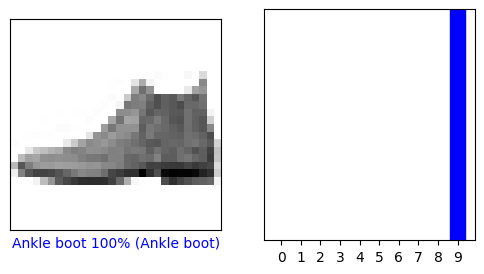

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

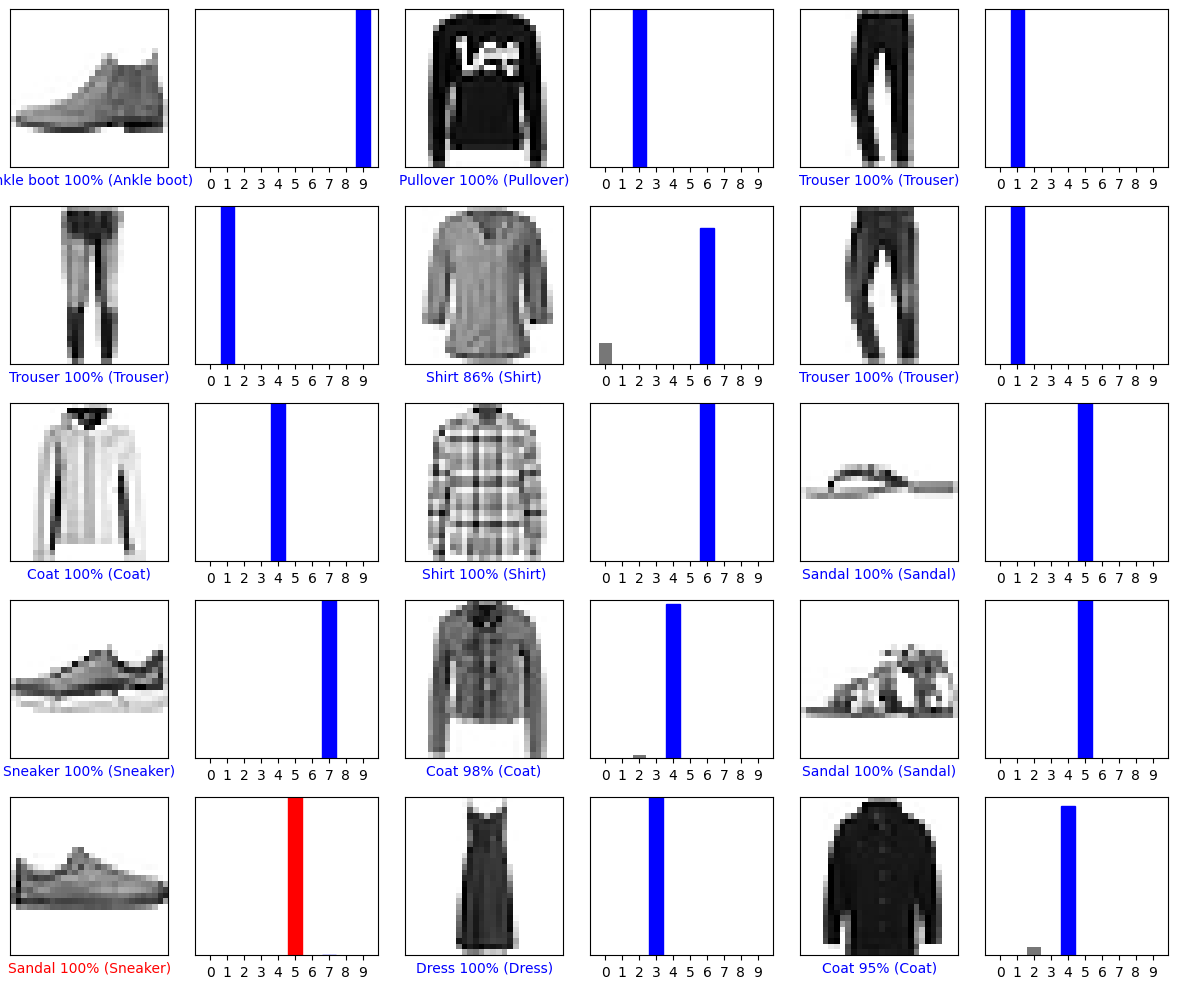

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()